# Tree building for 153 Coronavirus genomes

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/imperial-genomics-facility/viral-genome-notebook-image/master?urlpath=lab%2Ftree%2Fexamples%2Fcoronavirus_analysis_Tree_building_for_153_Coronavirus_genomes.ipynb)

* __Notebook version__: `v0.0.1`
* __Created by:__ [Dr. Hiren Ghosh](https://www.linkedin.com/in/hiren-ghosh-phd-6181853a), `Imperial BRC Genomics Facility`
* __Maintained by:__ `Imperial BRC Genomics Facility`
* __Docker image:__ [imperialgenomicsfacility/viral-genome-analysis-notebooks](https://hub.docker.com/r/imperialgenomicsfacility/viral-genome-analysis-notebooks)
* __Github repository:__ [imperial-genomics-facility/viral-genome-notebook-image](https://github.com/imperial-genomics-facility/viral-genome-notebook-image)
* __Created on:__ `2020-April-21 14:42`
* __Contact us:__ [Imperial BRC Genomics Facility](https://www.imperial.ac.uk/medicine/research-and-impact/facilities/genomics-facility/contact/)
* __License:__ [Apache License 2.0](https://github.com/imperial-genomics-facility/scanpy-notebook-image/blob/master/LICENSE)

## Fetch data

Download the aligned corona virus genomes from Genexa

In [1]:
## Downloading aligned fasta format

!wget https://storage.googleapis.com/sars-cov-2/MSA_SARS2_20200329.fasta

--2020-04-02 18:49:21--  https://storage.googleapis.com/sars-cov-2/MSA_SARS2_20200329.fasta
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4668949 (4.5M) [application/octet-stream]
Saving to: 'MSA_SARS2_20200329.fasta'

MSA_SARS2_20200329. 100%[===================>]   4.45M  --.-KB/s    in 0.06s   

2020-04-02 18:49:21 (70.8 MB/s) - 'MSA_SARS2_20200329.fasta' saved [4668949/4668949]



In [37]:
## DOwnloading data in Clustal format

!wget -O MSA_SARS2_20200329.aln https://storage.googleapis.com/sars-cov-2/MSA_SARS2_20200329.clw

--2020-04-02 19:10:59--  https://storage.googleapis.com/sars-cov-2/MSA_SARS2_20200329.clw
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5932931 (5.7M) [application/octet-stream]
Saving to: 'MSA_SARS2_20200329.aln'

MSA_SARS2_20200329. 100%[===================>]   5.66M  --.-KB/s    in 0.1s    

2020-04-02 19:10:59 (57.8 MB/s) - 'MSA_SARS2_20200329.aln' saved [5932931/5932931]



## Build phylogenetic tree with FastTree 

In [2]:
!FastTree -nt -gtr < MSA_SARS2_20200329.fasta >MSA_SARS2_20200329.tree

FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Generalized Time-Reversible, CAT approximation with 20 rate categories
Ignored unknown character D (seen 1 times)
Ignored unknown character H (seen 13 times)
Ignored unknown character K (seen 1 times)
Ignored unknown character R (seen 1 times)
Ignored unknown character S (seen 3 times)
Ignored unknown character V (seen 1 times)
Ignored unknown character W (seen 3 times)
Ignored unknown character X (seen 42 times)
Ignored unknown character Y (seen 17 times)
Initial topology in 2.67 seconds0 of    123   126 seqs (at seed    100)   
Refining topology: 28 rounds ME-NNIs, 2 rounds ME-SPRs, 14 rounds ML-NNIs
Total branch-length 0.010 after 19.69 sec, 101 of 124 splits, 0 changes   ax delta 0.000)   

WARNING! This alignment c

## Plot trees

In [3]:
import os
import requests
import json
import time
from ete3 import Tree, TreeStyle,SeqMotifFace
from PIL import Image
os.environ['QT_QPA_PLATFORM']='offscreen'

In [4]:
t = Tree("MSA_SARS2_20200329.tree")

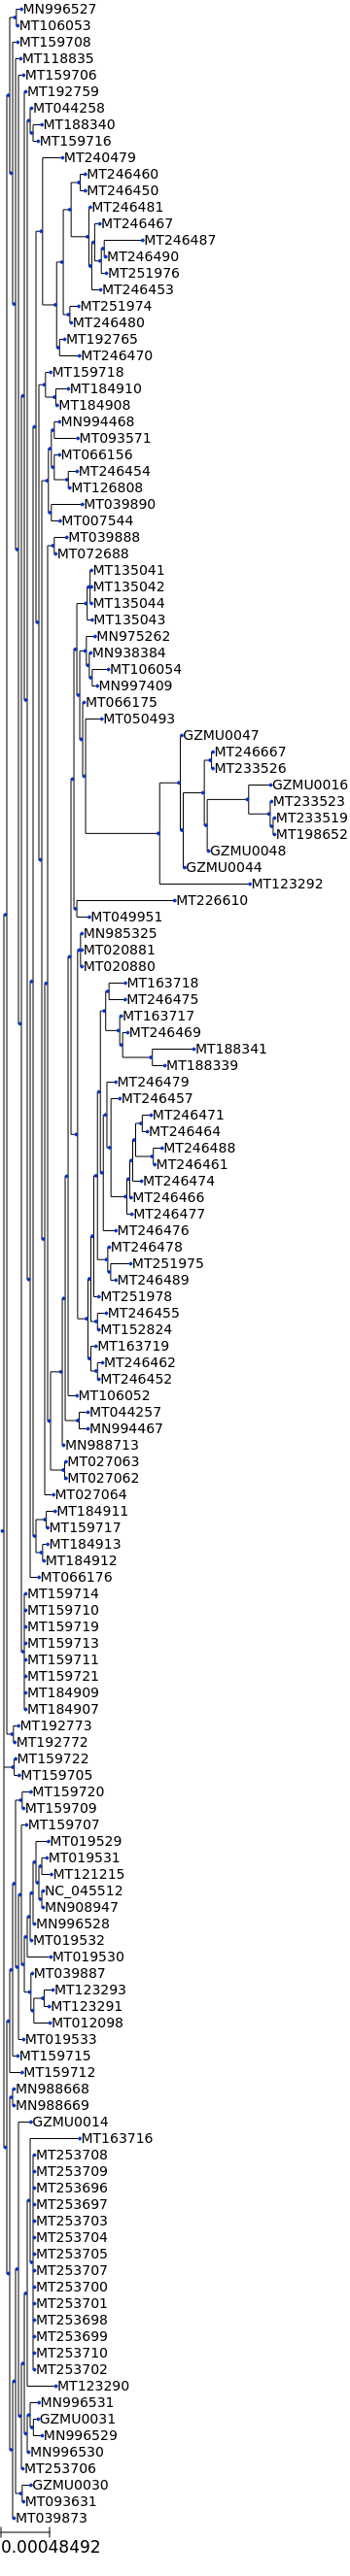

In [9]:
## plain tree
t.render("%%inline")

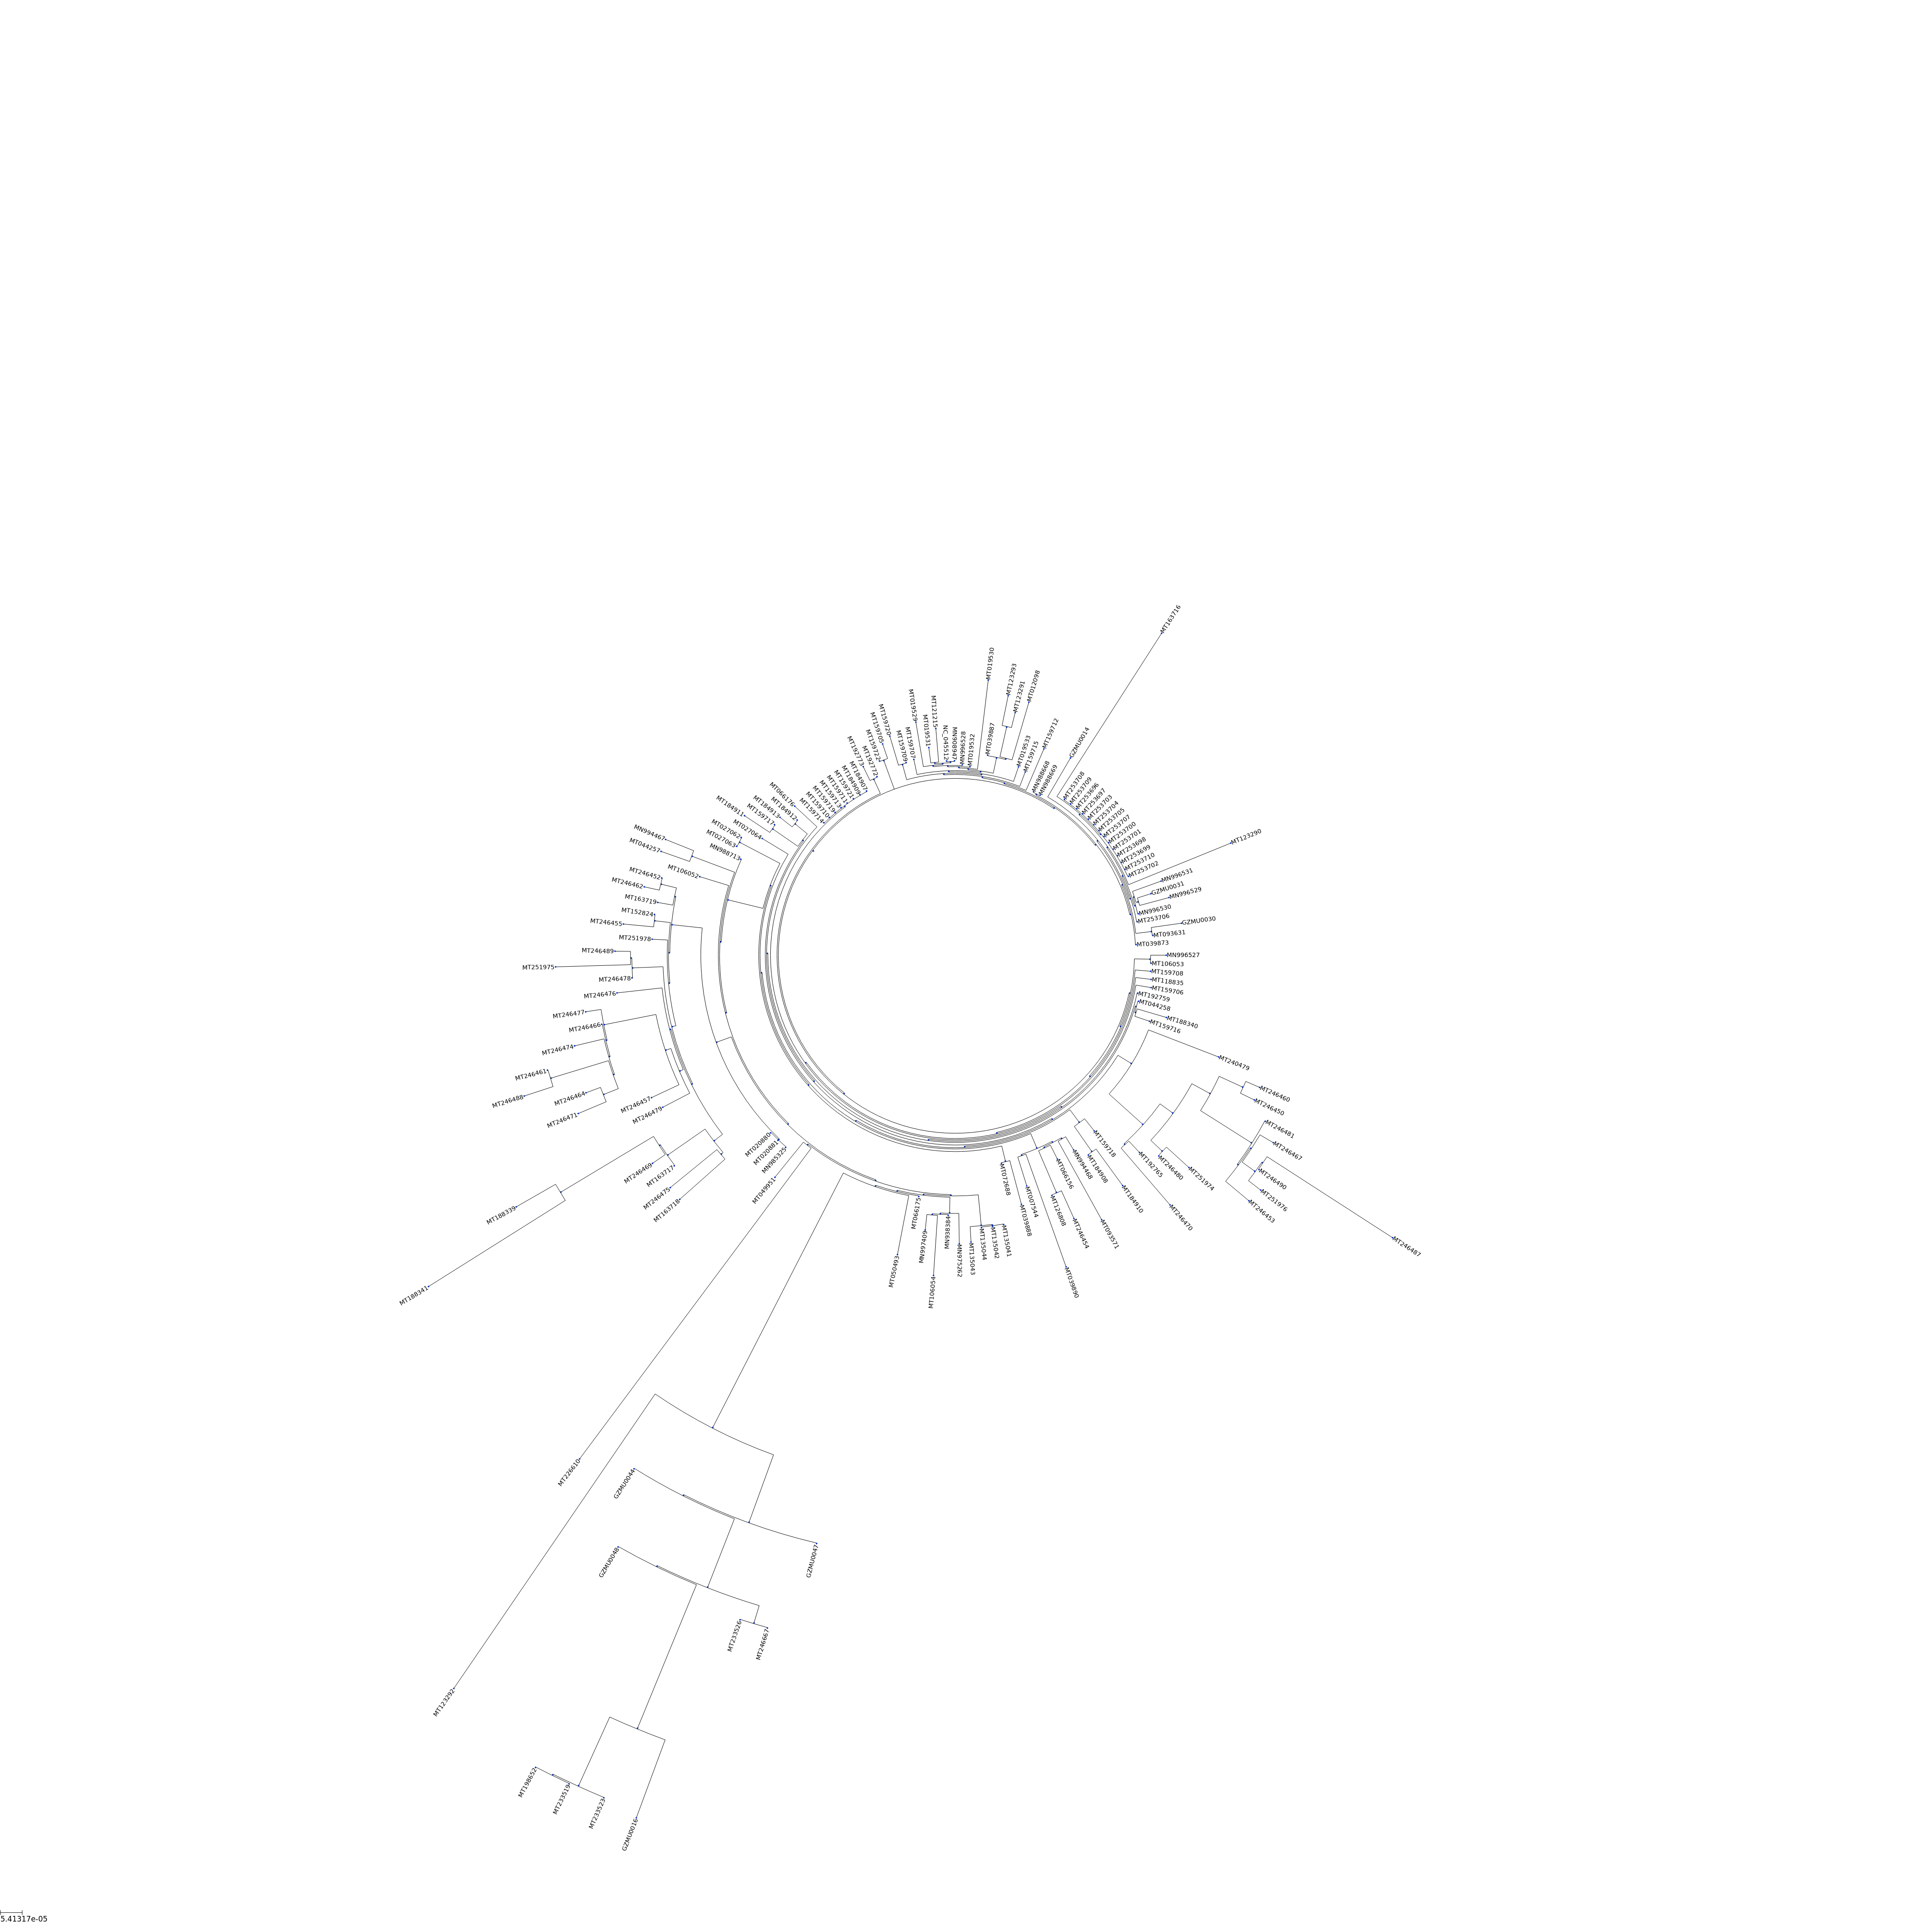

In [32]:
## circular tree
ts = TreeStyle()
ts.mode = "c"
#ts.scale = 20
t.render("%%inline",tree_style=ts)

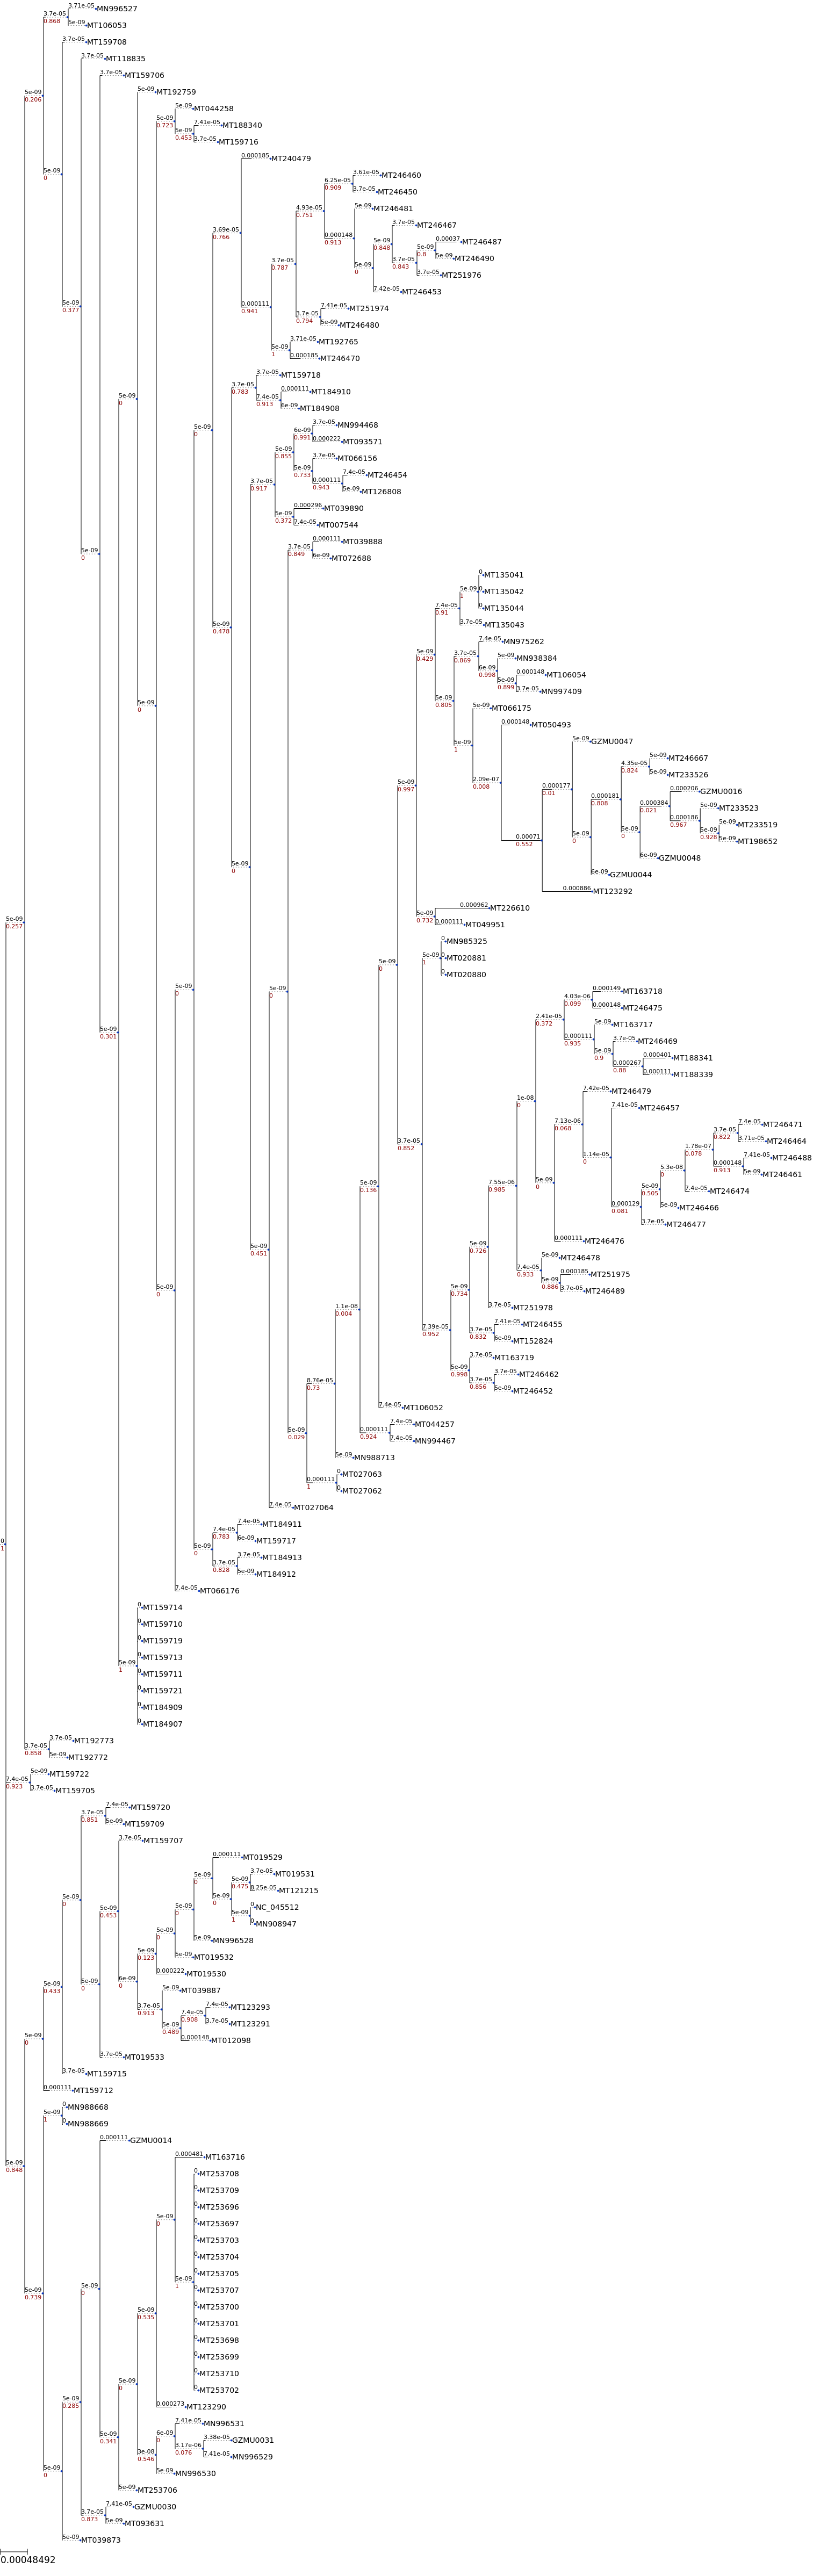

In [12]:
## tree with branch length
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.render("%%inline",tree_style=ts)

In [31]:
## 180 deg circular tree
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render("180_deg_circular_tree.png",tree_style=ts)
t.render("%%inline",tree_style=ts)

In [33]:
## read aligned fastq file
fasta_data = dict()
with open('MSA_SARS2_20200329.fasta','r') as fp:
    header = ''
    fasta_list = list()
    for line in fp:
        line = line.strip()
        if line.startswith('>'):
            if header != '':
                fasta_data.update({header:''.join(fasta_list)})
            header = line.split()[0].replace('>','')
            fasta_list = list()
        else:
            fasta_list.append(line)
    
    fasta_data.update({header:''.join(fasta_list)})

In [35]:
## plot tree with alignment
for seq_id,seq in fasta_data.items():
    seqFace = SeqMotifFace(seq, gapcolor="red")
    (t & "{0}".format(seq_id)).add_face(seqFace, 0, "aligned")
ts = TreeStyle()
ts.tree_width = 100
t.render("tree_with_aln.png", tree_style=ts);

## Reference
* Price, M.N., Dehal, P.S., and Arkin, A.P. (2009) FastTree: Computing Large Minimum-Evolution Trees with Profiles instead of a Distance Matrix. Molecular Biology and Evolution 26:1641-1650, doi:10.1093/molbev/msp077.
* Price, M.N., Dehal, P.S., and Arkin, A.P. (2010) FastTree 2 -- Approximately Maximum-Likelihood Trees for Large Alignments. PLoS ONE, 5(3):e9490. doi:10.1371/journal.pone.0009490.
* ETE 3: Reconstruction, analysis and visualization of phylogenomic data.
Jaime Huerta-Cepas, Francois Serra and Peer Bork. Mol Biol Evol 2016; doi: 10.1093/molbev/msw046